lena dilation


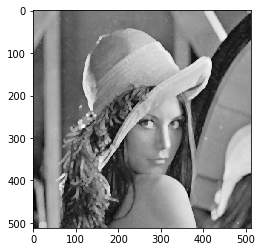

lena erosion


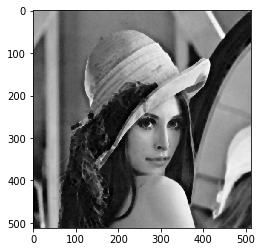

lena opening


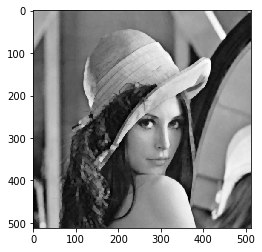

lena closing


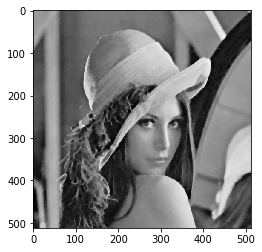

In [3]:
#!/usr/bin/env python
# coding: utf-8
# NTU CSIE, Computer Vision HW5, R08922024, Alfons Hwu

import cv2
import math, sys
import matplotlib.pyplot as plt
import numpy as np

####### IO ############
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

kernel = [[-2, -1], [-2, 0], [-2, 1],
[-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
[0, -2],  [0, -1], [0, 0], [0, 1], [0, 2],
[1, -2],  [1, -1], [1, 0], [1, 1], [1, 2],
          [2, -1], [2, 0], [2, 1]]

####### dilation #####
def dilation(a, b):
    ra, ca = a.shape # original image
    res = np.zeros(a.shape, dtype = 'int32')
    
    for ai in range(ra):
        for aj in range(ca):
                
                max_value = 0
                for b_each in b:
                    bi, bj = b_each
                    if  ai + bi >= 0 and ai + bi < ra \
                    and aj + bj >= 0 and aj + bj < ca: 
                        # extend the value
                        max_value = max(max_value, a[ai + bi, aj + bj])
                
                res[ai, aj] = max_value 
                        
    return res 

img_dilated = dilation(img, kernel)
print('lena dilation')
plt.imshow(img_dilated, cmap = 'gray')
plt.savefig('lena_dialated', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_dialated_cv.png', img_dilated)
plt.show()

####### erosion #######
def erosion(a, b):
    ra, ca = a.shape # original image
    res = np.zeros(a.shape, dtype = 'int32')
    
    for ai in range(ra):
        for aj in range(ca):
                
                min_value = 0x100
                for b_each in b:
                    bi, bj = b_each
                    if  ai + bi >= 0 and ai + bi < ra \
                    and aj + bj >= 0 and aj + bj < ca: 
                        # extend the value
                        min_value = min(min_value, a[ai + bi, aj + bj])
                    
                res[ai, aj] = min_value
    
    return res 

img_eroded = erosion(img, kernel)
print('lena erosion')
plt.imshow(img_eroded, cmap = 'gray')
plt.savefig('lena_eroded', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_eroded_cv.png', img_eroded)
plt.show()

####### opening #######
def opening(a, b):
    return dilation(erosion(a, b), b)

img_opened = opening(img, kernel)
print('lena opening')
plt.imshow(img_opened, cmap = 'gray')
plt.savefig('lena_opened', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_opened_cv.png', img_opened)
plt.show()

####### closing #######
def closing(a, b):
    return erosion(dilation(a, b), b)

img_closed = closing(img, kernel)
print('lena closing')
plt.imshow(img_closed, cmap = 'gray')
plt.savefig('lena_closed', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_closed_cv.png', img_closed)
plt.show()
